In [65]:
# import data and libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('linreg_ready_data.csv')
X = df.drop(columns=['log_price','zipcode_98023','zipcode_98032'], axis=1)
y = df['log_price']

### Training vs Testing error-can it predict data that it is not directly trained on?

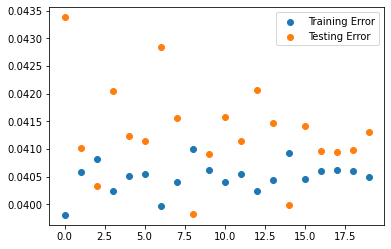

In [66]:
num = 20
train_err = []
test_err = []
linreg=LinearRegression()
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

### What information to share??
- most impactful factors: sqft_living, waterfront, location (also condition, bedrooms, sqft_basement)
- show correlation of sqft_living to price 1st sns (kind = reg) Blake
- best/worst month to buy??

### Visualizations
- sqft to price
- heatmap to show multicollinearity
- how to show why we picked what we picked?? Maybe get pvalues and plot them somehow??
- maybe just a table? Or distribution of pvalues? Maybe bar or histogram
- price, before and after log transform
- heterodasticity me

- heatmap - abs, .4 cutoff 2nd me
- 

In [31]:
#open the saved model
import pickle
with open('kc_county_multilinreg.sav', 'rb') as f:
    model = pickle.load(f)

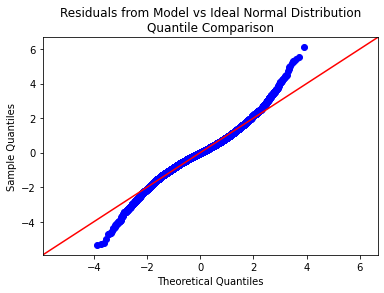

In [55]:
#get residuals and plot qqplot
import scipy.stats as stats
y_pred = model.predict(X)
y_pred = np.reshape(y_pred,(20110,))
resids = y_pred-np.array(df['log_price'])
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
plt.title('Residuals from Model vs Ideal Normal Distribution\nQuantile Comparison')
plt.show()

### Testing for homeskedasticity

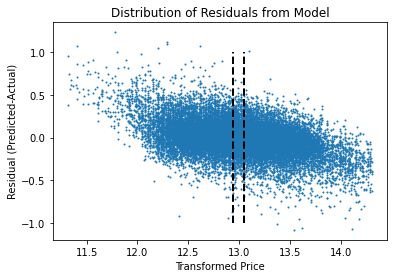

In [60]:
plt.figure()
plt.scatter(df['log_price'],resids,s=1)
lwr_thresh = df.log_price.quantile(q=.45)
upr_thresh = df.log_price.quantile(q=.55)
plt.vlines(lwr_thresh, ymax=1, ymin=-1, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=1, ymin=-1, linestyles='dashed',linewidth=2)
plt.title('Distribution of Residuals from Model')
plt.xlabel('Transformed Price')
plt.ylabel('Residual (Predicted-Actual)')
plt.show()

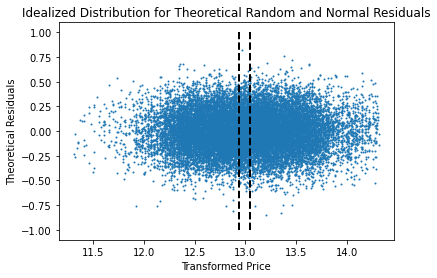

In [61]:
# creates random normal data with same mean and std dev as residuals
# plots what an "ideal" skedasticity plot should look like
unpaired_data = np.random.normal(loc=np.mean(resids),scale=np.std(resids),size=len(resids))
plt.figure()
plt.scatter(df['log_price'],unpaired_data,s=1)
lwr_thresh = df.log_price.quantile(q=.45)
upr_thresh = df.log_price.quantile(q=.55)
plt.vlines(lwr_thresh, ymax=1, ymin=-1, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=1, ymin=-1, linestyles='dashed',linewidth=2)

plt.title('Idealized Distribution for Theoretical Random and Normal Residuals')
plt.xlabel('Transformed Price')
plt.ylabel('Theoretical Residuals')
#random normal distribution with same mean and standard deviation
plt.show()